In [2]:
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite

data = pd.read_csv('DG-AssocMiner_miner-disease-gene-edited.tsv', sep='\t')
DG_graph = nx.Graph()
edgedata = list(zip(data['# Disease ID'], data['Gene_Name']))
disease_nodes = list(data['# Disease ID'])
gene_nodes = list(data['Gene_Name'])
DG_graph.add_edges_from(edgedata)
DG_graph.nodes

NodeView(('C0036095', 'VCAN', 'DAPK1', 'JAG1', 'MARK2', 'EN1', 'FANCA', 'FAT1', 'MLC1', 'RBFOX2', 'ZIM2', 'ASPM', 'GAS2', 'GAS6', 'PCSK1N', 'GUCY1A1', 'IGFBP2', 'AQP1', 'ITGB4', 'KRT5', 'KRT15', 'MARCKS', 'IRX4', 'ISYNA1', 'DTL', 'GINS2', 'PDZK1', 'SERPINF1', 'BCL11A', 'STAG3L1', 'MIER2', 'PRKD1', 'SLC24A3', 'PYGB', 'CCND1', 'ST3GAL4', 'SON', 'SOX4', 'SOX11', 'TOP2A', 'EFHD1', 'WNT5B', 'NETO2', 'HOMER3', 'ESPL1', 'CDH1', 'C0033941', 'ADORA2A', 'ACE', 'AKT1', 'ESR1', 'GRM2', 'GSTP1', 'HTR1A', 'HTR6', 'NPY1R', 'OPRM1', 'PHB', 'SLC6A3', 'SNCA', 'SOD2', 'CAMK2B', 'RGS9', 'PICK1', 'C0043459', 'HSD17B4', 'PEX1', 'PEX6', 'PEX10', 'PEX12', 'PEX13', 'PEX14', 'PEX26', 'PEX19', 'ABCD3', 'PEX2', 'PEX5', 'PEX3', 'PEX11B', 'PEX16', 'C0033860', 'TNIP1', 'CARM1', 'PSORS4', 'TRAF3IP2', 'HCP5', 'TAGAP', 'ZNF816', 'CP', 'CRP', 'PSORS8', 'CSF2', 'IL23R', 'IFNLR1', 'DDX58', 'FUT2', 'GJB2', 'CYP2S1', 'HLA-C', 'HCAR2', 'APOE', 'LCE3B', 'LCE3C', 'IL1B', 'IL4', 'IL6', 'IL12B', 'IL13', 'PSORS9', 'LINC01185', 'M

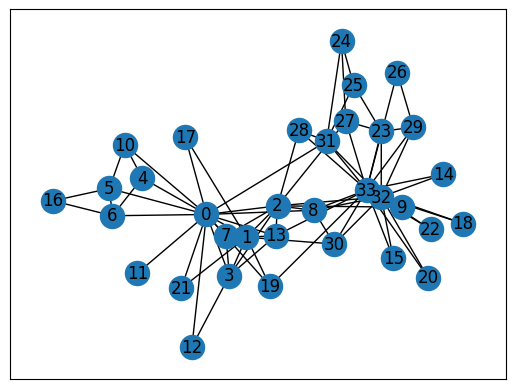

In [3]:
karate = nx.karate_club_graph()
nx.draw_networkx(karate)

In [4]:
# tried to find the local neighborhood of a node in a graph;
# don't know if this is the right way to do it
from random import randint

def get_local_nbrhd(graph, walk_len = 2, iter_count = 10):
    local_nbrhd = {}
    for node in graph.nodes:
        discovered = []
        curr_node = node
        
        for i in range(iter_count):
            walk_dist = walk_len
            while walk_dist > 0:
                curr_node_nbrs = [i for i in graph.neighbors(curr_node)]
                rand_idx = randint(0, len(curr_node_nbrs)-1)
                curr_node = curr_node_nbrs[rand_idx]
                if curr_node not in discovered:
                    discovered.append(curr_node)
                walk_dist -= 1

        local_nbrhd[node] = discovered

    return local_nbrhd

lnbrs = get_local_nbrhd(karate, walk_len=2, iter_count=50)
print(lnbrs)



{0: [6, 0, 1, 7, 2, 8, 27, 24, 23, 33, 28, 31, 32, 30, 29, 21, 13, 3, 12, 4, 19, 10, 5, 25, 14, 9, 16], 1: [19, 0, 4, 6, 16, 5, 10, 31, 24, 25, 23, 27, 2, 1, 13, 21, 8, 33, 9, 3, 7, 32, 26, 20, 15, 29], 2: [0, 21, 1, 2, 7, 3, 31, 24, 28, 33, 19, 27, 22, 32, 30, 17, 13, 12, 20, 18, 10, 5, 6, 23, 29, 16], 3: [7, 3, 1, 30, 32, 20, 8, 0, 21, 12, 13, 33, 29, 28, 2, 18, 19, 26, 22, 31, 24, 25, 23, 14, 15], 4: [10, 0, 5, 4, 16, 6, 1, 13, 2, 32, 20, 33, 28, 8, 30, 7, 3, 12, 17, 26, 29, 23, 27, 24, 31, 25, 22, 18], 5: [16, 6, 0, 7, 1, 30, 32, 31, 33, 18, 2, 27, 24, 25, 23, 20, 28, 4, 17, 13, 3, 8, 29, 26, 22], 6: [4, 0, 19, 33, 8, 3, 13, 21, 1, 17, 7, 2, 30, 27, 9, 18, 32, 22, 20, 15, 31, 25, 23, 14, 11, 29], 7: [3, 0, 31, 28, 13, 2, 25, 23, 24, 12, 8, 33, 30, 14, 32, 1, 20, 29, 27, 26, 15, 22, 18, 19], 8: [0, 2, 1, 21, 17, 13, 19, 32, 8, 31, 24, 27, 23, 29, 25, 18, 33, 30, 15, 14, 22, 26, 12, 3, 7, 11], 9: [2, 8, 30, 33, 13, 19, 27, 1, 21, 0, 10, 5, 16, 6, 7, 4, 11, 3, 28, 32, 20, 15, 18, 22, 

In [5]:
len(karate.nodes)

34

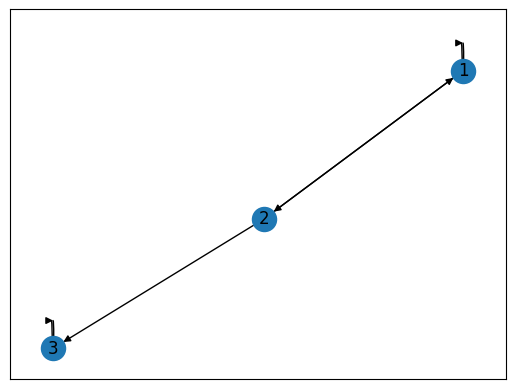

In [6]:
toy_digraph = nx.DiGraph()

edge_list = [
    (1, 2), (2, 1), (2, 3), (1, 1), (3, 3)
]

toy_digraph.add_edges_from(edge_list)
nx.draw_networkx(toy_digraph)


In [7]:
import numpy as np

def PageRank(digraph, beta):
    stoch_matrix = np.zeros((len(digraph.nodes), len(digraph.nodes)))
    n = len(digraph.nodes)

    adj = nx.adjacency_matrix(digraph).todense()
    adj = np.array(adj)

    for j in range(n):
        stoch_matrix[j] = adj[j] / np.sum(adj[j])
            
    stoch_matrix = stoch_matrix.T

    # print(stoch_matrix)

    n_matrix = np.ones((len(digraph.nodes))) * (1/len(digraph.nodes))

    stoch_matrix = beta*stoch_matrix + (1-beta)*n_matrix

    # print(stoch_matrix)

    r = n_matrix            # for initialisation
    epsilon = 0.0000001
    for _ in range(50):
        r_new = np.dot(stoch_matrix, r.T)
        if np.linalg.norm(r_new - r) < epsilon:
            break
        r = r_new
    
    return list(zip(digraph.nodes, r))

PageRank(toy_digraph, beta = 0.4)

[(1, 0.3157895318186666), (2, 0.2631579306666666), (3, 0.42105253751466654)]

In [8]:
my_pr_data = PageRank(DG_graph, beta = 0.8)
nx_pr_data = nx.pagerank(DG_graph, alpha = 0.8)
nx_pr_data = sorted(nx_pr_data.items(), key = lambda x: x[1], reverse = True)
nx_pr_data

[('C0017661', 0.013439319539670223),
 ('C0033578', 0.010994203984781535),
 ('C1458155', 0.00880148193197901),
 ('C0036341', 0.0073690526546466885),
 ('C0028754', 0.007223046789607344),
 ('C0031117', 0.007212455274931566),
 ('C0038356', 0.005564704649091409),
 ('C0004352', 0.005464876876664783),
 ('C0025202', 0.005240197393571605),
 ('C0032460', 0.0047891663476918814),
 ('C0003873', 0.0046697320440746174),
 ('C0009404', 0.0046140869243200405),
 ('C2239176', 0.004164874972564518),
 ('C0002395', 0.003948861156891288),
 ('C0014175', 0.003807219081030473),
 ('C0151744', 0.0036111351710722177),
 ('C0011860', 0.003539110640042406),
 ('C0020538', 0.0034699517167319305),
 ('C3714756', 0.0034081321376496585),
 ('C3495559', 0.003377283067437056),
 ('C0236969', 0.0033623952358853466),
 ('C0376634', 0.003246530477256675),
 ('C0027627', 0.0031443920308989464),
 ('C0035334', 0.003099786950793622),
 ('C0024121', 0.002943393369246242),
 ('C0007134', 0.0027503791023796094),
 ('C0024668', 0.0026739297449

In [9]:
'''
TODO: 
1. clustering using Louvain or Girvan Newman method (to get an idea of what are the major diseases and what are the rarer ones)
2. find overlapping neighbourhoods for pairs of diseases (try doing this using powers of adjacency matrix or local neighbourhood overlap algorithms)
3. find the weighted projection of the disease gene network on the disease space. 
    - weights are defined as the number of genes connecting the two diseases. 
    - weights will tell how strong the interrelation between the two diseases is. 
    - edges with the highest weights will tell the inverse comorbidity relations. 
'''


'\nTODO: \n1. clustering using Louvain or Girvan Newman method (to get an idea of what are the major diseases and what are the rarer ones)\n2. find overlapping neighbourhoods for pairs of diseases (try doing this using powers of adjacency matrix or local neighbourhood overlap algorithms)\n3. find the weighted projection of the disease gene network on the disease space. \n    - weights are defined as the number of genes connecting the two diseases. \n    - weights will tell how strong the interrelation between the two diseases is. \n    - edges with the highest weights will tell the inverse comorbidity relations. \n'

In [10]:
# from itertools import combinations

# def get_neighbourhood_overlap(graph, n1, n2):
#     if n1 not in graph.nodes or n2 not in graph.nodes:
#         print(nx.NodeNotFound, ': Graph does not have one or more nodes passed through the function')
#     else:
#         primary_nbrhd_1 = nx.neighbors(graph, n1)
#         primary_nbrhd_2 = nx.neighbors(graph, n2)
#         common_nodes = [i for i in primary_nbrhd_1 if i in primary_nbrhd_2]
#         overlap_strength = len(common_nodes)
#         return common_nodes, overlap_strength
    
# def get_projection(graph, nodes):
#     projection = nx.Graph()
#     projection.add_nodes_from(nodes)
#     combs = combinations(nodes, 2)
#     for comb in combs:
#         _, ov_st = get_neighbourhood_overlap(graph, comb[0], comb[1])
#         projection.add_edge(comb[0], comb[1], weight = ov_st)
#         print(comb)
#     return projection

# disease_projection = get_projection(DG_graph, disease_nodes)
# gene_projection = get_projection(DG_graph, gene_nodes)


In [28]:
from itertools import combinations
def get_edge_wt_projection(graph, nodes):
    wt_prj = nx.Graph()
    combs = combinations(nodes, 2)
    prj = nx.bipartite.projected_graph(graph, nodes)

    for comb in combs:
        if comb in prj.edges:
            if comb in wt_prj.edges:
                wt_prj[comb[0]][comb[1]]['weight'] += 1
            else:
                wt_prj.add_edge(comb[0], comb[1], weight = 1)
        else:
            continue
    
    # count how many nodes are common between the neighbourhoods of the two nodes
    return wt_prj

disease_projection = get_edge_wt_projection(DG_graph, disease_nodes)
gene_projection = get_edge_wt_projection(DG_graph, gene_nodes)


In [25]:
prj = nx.projected_graph(DG_graph, disease_nodes, multigraph = True)
prj.edges(data = True)

MultiEdgeDataView([('C0036095', 'C0027627', {}), ('C0036095', 'C0027627', {}), ('C0036095', 'C1458155', {}), ('C0036095', 'C1458155', {}), ('C0036095', 'C1458155', {}), ('C0036095', 'C1458155', {}), ('C0036095', 'C1458155', {}), ('C0036095', 'C0007131', {}), ('C0036095', 'C0011616', {}), ('C0036095', 'C0023893', {}), ('C0036095', 'C0026764', {}), ('C0036095', 'C0015625', {}), ('C0036095', 'C0014170', {}), ('C0036095', 'C0017638', {}), ('C0036095', 'C0023467', {}), ('C0036095', 'C2609414', {}), ('C0036095', 'C0007138', {}), ('C0036095', 'C0007138', {}), ('C0036095', 'C0007138', {}), ('C0036095', 'C0009404', {}), ('C0036095', 'C0009404', {}), ('C0036095', 'C0009404', {}), ('C0036095', 'C0009404', {}), ('C0036095', 'C0334634', {}), ('C0036095', 'C0039685', {}), ('C0036095', 'C0023434', {}), ('C0036095', 'C0023418', {}), ('C0036095', 'C0023418', {}), ('C0036095', 'C0000786', {}), ('C0036095', 'C0042900', {}), ('C0036095', 'C0024121', {}), ('C0036095', 'C0024121', {}), ('C0036095', 'C002412

In [33]:
# sort the edges according to the weights
sortededges = sorted(disease_projection.edges(data = True), key = lambda x: x[2]['weight'])
top5 = sortededges[:5]
top5

[('C0270850', 'C0270853', {'weight': 56}),
 ('C0270850', 'C0014553', {'weight': 70}),
 ('C0270850', 'C0027796', {'weight': 77}),
 ('C0014553', 'C0270853', {'weight': 80}),
 ('C0270850', 'C0020437', {'weight': 84})]

In [35]:
# find the inverse comorbidity relations
bottom5 = sortededges[-10:]
bottom5

# this has a lot of diseases that are not completely of genetic origin
# we need to filter out those diseases that are purely genetic in origin and the remaining ones will be the ones that are genetically inversely comorbid

[('C1458155', 'C0028754', {'weight': 126003}),
 ('C0031117', 'C0017661', {'weight': 126144}),
 ('C0028754', 'C0017661', {'weight': 127458}),
 ('C0033578', 'C0036341', {'weight': 131104}),
 ('C0033578', 'C0038356', {'weight': 136888}),
 ('C0033578', 'C0031117', {'weight': 138816}),
 ('C0033578', 'C0028754', {'weight': 140262}),
 ('C1458155', 'C0017661', {'weight': 189654}),
 ('C0033578', 'C1458155', {'weight': 208706}),
 ('C0033578', 'C0017661', {'weight': 211116})]